# Taller 3: Segmentación

Utilizando únicamente las operaciones vistas hasta el momento, segmente la figura de tal manera que los personajes aparezcan sean segmentados correctamente (en blanco), conservando de la mejor manera la figura original, sin introducir artefactos.  Esta es la imagen original:

In [283]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from skimage.segmentation import flood

# Cargar imagen en escala de grises
PATH = './imagenes/'
img = cv2.imread(PATH + 'amour2.png', cv2.IMREAD_GRAYSCALE)

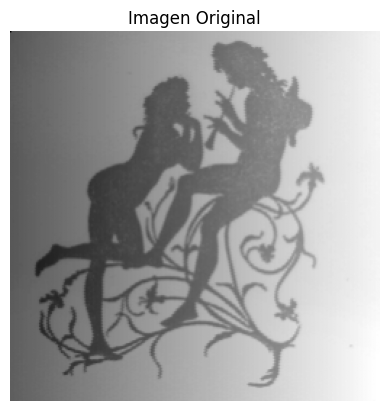

In [284]:
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

Se cargó la imagen y se aplicó umbralización dinámica (local). Con esto delimitamos la figura, pero generamos un artefacto en el borde izquierdo, precisamente asociado a la iluminación de la imagen. Luego, se realizó una segmentación por crecimiento de regiones, poniendo la semilla en la figura. Con esto limpiamos el borde y queda la imagen segmentada correctamente.

In [285]:
threshold = threshold_local(img, block_size=151, method='mean')
binary_image = img > threshold
thresholded_image = (binary_image*255).astype(np.uint8)

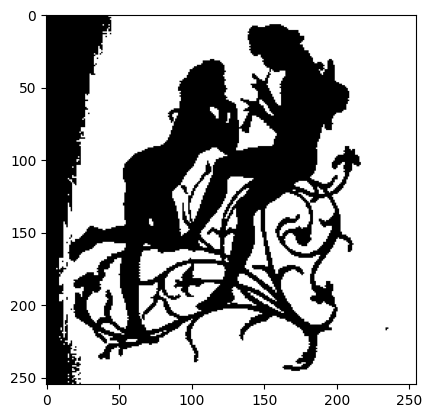

In [286]:
plt.imshow(thresholded_image, cmap='grey')
plt.show()

In [292]:
seed = (100, 100)
imagen_final = flood(thresholded_image, seed, tolerance=10)

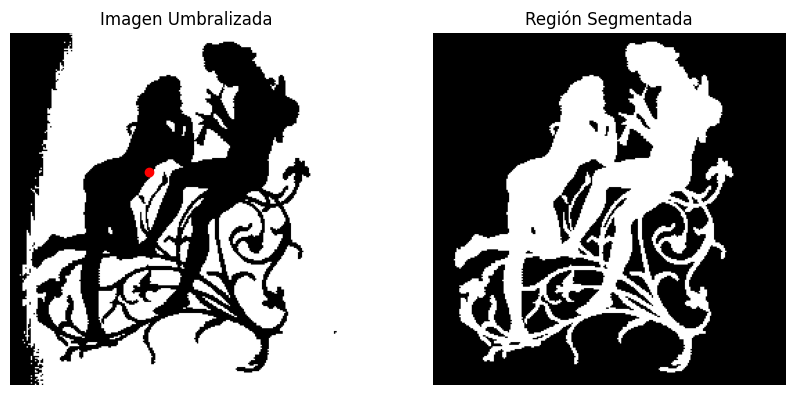

In [293]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(thresholded_image, cmap='grey')
axs[0].set_title('Imagen Umbralizada')
axs[0].axis('off')
axs[0].plot(seed[1], seed[0], 'ro')
axs[1].imshow(imagen_final, cmap='grey')
axs[1].set_title('Región Segmentada')
axs[1].axis('off')
plt.show()

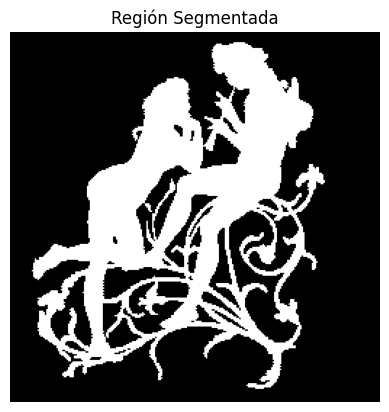

In [294]:
plt.imshow(imagen_final, cmap='gray')
plt.title('Región Segmentada')
plt.axis('off')
plt.show()